# Bungee Characterization Lab
## PH 211 COCC
### Bruce Emerson 1/12/2020

This notebook is meant to provide tools and discussion to support data analysis and presentation as you generate your lab reports. 

[Bungee Characterization (Bungee I)](http://coccweb.cocc.edu/bemerson/PhysicsGlobal/Courses/PH211/PH211Materials/PH211Labs/PH211LabbungeeI.html) and [Bungee I Lab Discussion](http://coccweb.cocc.edu/bemerson/PhysicsGlobal/Courses/PH211/PH211Materials/PH211Labs/PH211LabDbungeeI.html)

In this lab we are gathering some data, entering the data into the notebook, plotting the data as a scatterplot, plotting a physics model of the bungee, and finally looking for patterns through normalizing the data.

For the formal lab report you will want to create your own description of what you understand the process and intended outcome of the lab is. Please don't just copy the purpose statement from the lab page.

## Dependencies

This is where we load in the various libraries of python tools that are needed for the particular work we are undertaking.  
  
```numpy``` is a numerical tools library - often imported as np. ```numpy``` also contains the statistical tools that we will use in this lab. There are other libraries dedicated to statistical tools but 'numpy' has everything we need.  
```matplotlib```is a 'MATLAB like' library. 
```matplotlib.pyplot``` is often imported as ```plt``` to make it easier to use. ```matplotlib``` has the plotting tools that we need for this lab.  

The following code cell will need to be run first before any other code cells.

In [1]:
import numpy as np
import matplotlib as mplot
import matplotlib.pyplot as plt


## Data Entry (Lists/Vectors)

As we learned last week we can manually enter our data in as lists. See last weeks lab for reminders if needed. In this lab we are working with data pairs (x,y data). There are a number of ways of doing this but the most conceptually direct approach is to create an ordered list of the xdata and the ydata separately. Notice that I can 'fold' long lines of data by entering a new line after the comma. This is handy when manually entering data. The data shown here is completely manufactured but has some of the same characteristics as the data you are gathering.

Be aware that you will gathering two sets of data yourself and getting a third data set from another group. Plan out how you will keep track of each data set with thoughtful naming choices.

In [3]:
xdata1 = [3.23961446, 12.3658087, 27.08638038, 36.88808393,
         48.5373278, 43.90496472, 75.81073494, 105.42389529,
         123.53497036, 158.87537602]
ydata1 = [0.62146893, 1.53513096, 3.97591135,
         4.54284862, 6.23415512, 5.12951366,
         6.1733864, 7.9524996, 8.90050684, 10.29383595]
xdata2 = [60., 100.]
ydata2 = [2., 3.]
# 2 ways to print out and check your data

print("stretch data:",xdata1)
print("force data:",ydata1)

stretch data: [3.23961446, 12.3658087, 27.08638038, 36.88808393, 48.5373278, 43.90496472, 75.81073494, 105.42389529, 123.53497036, 158.87537602]
force data: [0.62146893, 1.53513096, 3.97591135, 4.54284862, 6.23415512, 5.12951366, 6.1733864, 7.9524996, 8.90050684, 10.29383595]


## Check data points

There are various ways you might choose to check your data points. You can look through the list aboce or you can ask python to count for you as shown below. Check that the number of data points matches your expectation and is the same for both the x and y lists.

In [5]:
xdata1length = len(xdata1)
ydata1length = len(ydata1)
# length counts how many 'data points' in the list
print("number of data points (x):", xdata1length)
print("number of data points (y):", ydata1length)

number of data points (x): 10
number of data points (y): 10


### Scatter Plots 

Most data that we will want to analyze in physics is (x,y) data. For this type of data the typical plot type is called a scatter plot which is just what you think of when you plot individual data points.

To begin the process in python we need to create a container for the multiple plots we will be creating. One way (not the only way) to dothis is with the ```plt.subplots``` function. This creates a container (called fig in this case) and a first set of axes called ax in this case. 

[pyplot subplots documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)

We can then layer multiple plots onto these axes (ax) by plotting and replotting until we are ready to show the whole thing. In this cell I am only creating a single plot of the first data set.

[pyplot scatter documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) 



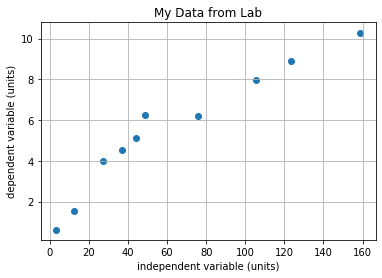

In [6]:

fig, ax = plt.subplots()
ax.scatter(xdata1, ydata1)

ax.set(xlabel='independent variable (units)', ylabel='dependent variable (units)',
       title='My Data from Lab')
ax.grid()

#fig.savefig("myplot.png")
plt.show()

### Adding more data

When I want to add more data I just make another plot on a new set of axes. I have to start a new container (fig) because the ```plt.show()``` call blocks me from adding more information to the plot (there is something in this that is still not clear to me and perhaps soon I will 

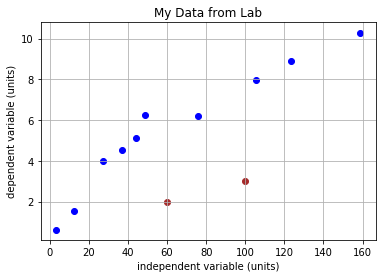

In [7]:

fig, ax = plt.subplots()
ax.scatter(xdata1, ydata1, color = 'blue')
ax.scatter(xdata2, ydata2, color = 'brown')

ax.set(xlabel='independent variable (units)', ylabel='dependent variable (units)',
       title='My Data from Lab')
ax.grid()

#fig.savefig("myplot.png")
plt.show()

### Discussion: Deliverable 2

The second deliverable asks you to consider the data from your plot(s) and describe whether it has features that are consistent with an ideal physics spring (Hooke's Law). Are some regions linear? ....sort of? Is the spring stiffer at the beginning or at the end of data? Explain your answer. Do both sets of data show similar behavior? How or how not?

### Add physics model...

For the lab you are asked to draw straight lines that 'model' (describe) the behavior of the early and latter parts of your data sets. When we are creating physics models we are now generating 'data points' from a mathematical description. Again, there are a number of ways to do this but what I will show here is typical of physics and engineering models.

It starts by defining a set of x values.```numpy.linspace()``` is a tool for doing this and because we did ```import numpy as np``` it shows in the code as ```np.linspace()```

[numpy.linspace documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)

What the function does is generate a list of values that are evenly distributed between 'begin' and 'end' in ```np.linspace('begin','end',# values)```  

In this lab we are exploring linear models (Hooke's Law) for the behavior of the bungee (spring) which means we need a slope and a y intercept. One the nice features of lists is that if I multiply a list by a number I get a new list with the same number of elements each of which is multiplied by the number. Be careful. The calculation that looks like it's relating a single x and y value is really connecting a list of x and y values.

In [17]:
# actual model parameters - slope and intercept
model1slope = .12
model2slope = .045
model1int = 0.
model2int = 3.

# range of x values -- choose lower and upper limits of range
model1x = np.linspace(0.,50.,20)
model2x = np.linspace(30.,170.,20)

# in case you want to check how many values are generated
# modellength = len(model1x)
# print(modellength)

# generate y values from model
model1y = model1slope*model1x + model1int
model2y = model2slope*model2x + model2int


### Plotting References

There are a range of different marks that you can use to plot your data points on the scatter plot. Here is the link...  

[marker types for scatter plot](https://matplotlib.org/3.1.0/api/markers_api.html#module-matplotlib.markers)

There are also a range of colors that you can use for all plots. I am not yet clear when some can or can't be used but here's the reference if you want to experiment...

[matplotlib named colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

When plotting lines (```ax2.plot()```) there are a few line styles you can use from solid lines to various dashed lines. Here's the reference....

[matplotlib line styles for plot](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html)

You will notice that I added a label to each plot. This is then picked up and attached to each plot and displayed in the legend. You can decide where to place the legend on the plot by choosing different values for 'loc'. Play with this to get a helpful placement.

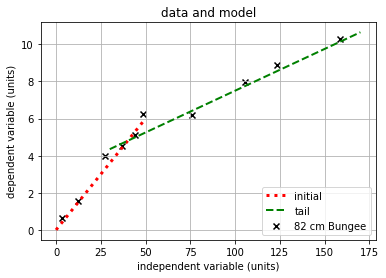

In [25]:
fig2, ax2 = plt.subplots()
ax2.scatter(xdata1, ydata1, marker = 'x', color = 'black', label = "82 cm Bungee")
ax2.plot(model1x, model1y, color = 'red', linestyle = ':', linewidth = 3., label = "initial")
ax2.plot(model2x, model2y, color = 'green', linestyle = '--', linewidth = 2., label = "tail")
ax2.set(xlabel='independent variable (units)', ylabel='dependent variable (units)',
       title='data and model')
ax2.grid()
plt.legend(loc= 4)
plt.show()

### Discussion: Deliverable III

So what does your plot above mean? What explanation of the behavior of the bungee is suggested by the two line fit?

### Normalization

Normalization is the process of trying to see if a particular feature of the data has a simple dependence. In this case each bungee is a different length but otherwise they seem like would behave very similarly. To explore this question we normalize the stretch by dividing it by the original length of the cord. Do this for **both** sets of data and then replot.

The value of this normalization exercise is the impact of plotting data from multiple bungees. What I show here is the normalization of just one bungee. You will need to do 2 or 3 depending on how much data you have and plot them all simultaneously. Using different colors for each data set will help keep track of which ones are which.

You will note that I couldn't normalize by doing the obvious thing - ```xdata1norm = xdata1/length1```. Python doesn't like this (try it and look at the error message) so I had to hunt around and found this useful function. There may be other ways to accomplish this task but this works so that's where I'm going. As usual here is the documentation link:

[numpy.true_divide](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.true_divide.html)

In [12]:
length1 = 75.
xdata1norm = np.true_divide(xdata1,length1)

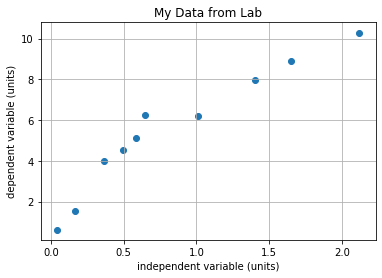

In [13]:

fig, axn = plt.subplots()
axn.scatter(xdata1norm, ydata1)

axn.set(xlabel='independent variable (units)', ylabel='dependent variable (units)',
       title='My Data from Lab')
axn.grid()

#fig.savefig("myplot.png")
plt.show()

### Discussion: Deliverable V

What does it mean? What we expect is that the data for all the different bungees makes a single shape as opposed to a family of similar shapes. How might this help us predict the behavior of a bungee of a different length?

## Reflection

As usual I learned a bunch of new stuff in the process of creating this notebook as a framework for your lab report. Thanks.

### Extensions

Extensions are ideas that I didn't have time to explore or develop fully for this lab. These are offered as opportunities for students with more programming experience than is typical for students in the class.

#### Create a separate legend for reporting slopes of the fit lines

I feel like this might be nice at some future time.

#### Least squares fit of straight line to data

I am strongly in favor of drawing our own lines on the data because it makes us think about what the terms in the line mean in contect. Never the less I would love to know how to get numpy to do a least squares polynomial fit that I can hold to a linear function. Would also be interested in a higher order ($x^2$ or $x^3$) fit to the whole data set.

#### Standard Deviation

This is a long way out. Each data point has a certain amount of uncertainty due to issues of reproducibility (mostly due to heating of the bungee). Is there a straightforward way to attach a bar of the correct length (either horizontally or vertically) to represent the standard deviation.